In [65]:
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

def write_answer(n, value):
    with open('{}.bagging.txt'.format(n), 'w') as f:
        f.write(str(value))

digits = load_digits()
X, y = digits.data, digits.target

### Default DecisionTreeClassifier

In [66]:
classifier = DecisionTreeClassifier()
score = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
mean_score = score.mean()
write_answer(1, mean_score)
mean_score

0.82584469845451847

### BaggingClassifier with n_estimators=100

In [67]:
classifier = BaggingClassifier(n_estimators=100)
score = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
mean_score = score.mean()
write_answer(2, mean_score)
mean_score

0.92205909762853611

### BaggingClassifier with max_features=$\sqrt{d}$

In [68]:
max_features = int(np.sqrt(X.shape[1]))
classifier = BaggingClassifier(max_features=max_features, n_estimators=100)
score = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
mean_score = score.mean()
write_answer(3, mean_score)
mean_score

0.92433537491024809

### BaggingClassifier with custom estimator

In [69]:
max_features = int(np.sqrt(X.shape[1]))
estimator = DecisionTreeClassifier(max_features=max_features)
classifier = BaggingClassifier(estimator, n_estimators=100)
score = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
mean_score = score.mean()
write_answer(4, mean_score)
mean_score

0.95059120872300329

### Ananlyzing data

Text(0,0.5,u'n_estimators')

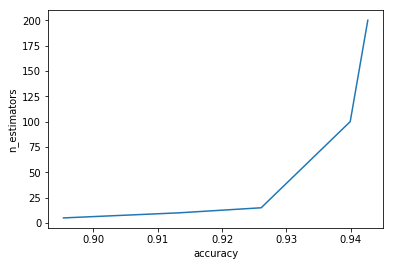

In [49]:
scores = []
ns = [5, 10, 15, 100, 200]
for n_estimators in ns:
    classifier = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)
    score = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
    scores.append(score.mean())

plt.plot(scores, ns)
plt.xlabel('accuracy')
plt.ylabel('n_estimators')

Text(0,0.5,u'max_features')

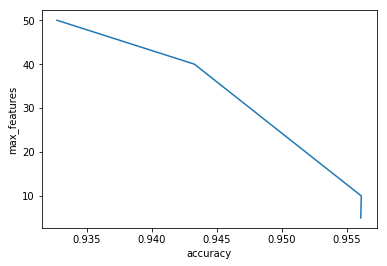

In [43]:
scores = []
features_count = [5, 10, 40, 50]
for max_features in features_count:
    classifier = RandomForestClassifier(n_estimators=100, max_features=max_features)
    score = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
    scores.append(score.mean())
    
plt.plot(scores, features_count)
plt.xlabel('accuracy')
plt.ylabel('max_features')

Text(0,0.5,u'max_depth')

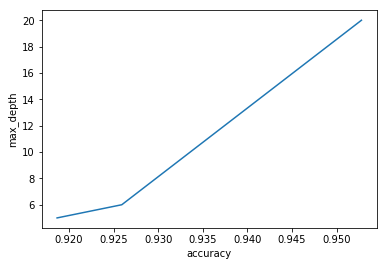

In [59]:
max_features = int(np.sqrt(X.shape[1]))
scores = []
depths = [5, 6, 20]
for max_depth in depths:
    classifier = RandomForestClassifier(n_estimators=100, max_features=max_features, max_depth=max_depth)
    score = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
    scores.append(score.mean())
    
plt.plot(scores, depths)
plt.xlabel('accuracy')
plt.ylabel('max_depth')

In [50]:
write_answer(5, '2 3 4 7')